In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [23]:
dfn= pd.read_csv("dataset//dataset_sdn_normal.csv")
print(dfn.head())
print(dfn.info())

      dt  switch        src        dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  167772161  167772168     45304   48294064  100  716000000   
1  11605       1  167772161  167772168    126395  134737070  280  734000000   
2  11425       1  167772162  167772168     90333   96294978  200  744000000   
3  11425       1  167772162  167772168     90333   96294978  200  744000000   
4  11425       1  167772162  167772168     90333   96294978  200  744000000   

        tot_dur  flows  ...  Protocol  port_no   tx_bytes  rx_bytes  tx_kbps  \
0  1.010000e+11      3  ...         1        3  143928631      3917        0   
1  2.810000e+11      2  ...         1        4       3842      3520        0   
2  2.010000e+11      3  ...         1        1       3795      1242        0   
3  2.010000e+11      3  ...         1        2       3688      1492        0   
4  2.010000e+11      3  ...         1        3       3413      3665        0   

   rx_kbps  A1  A2  tot_kbps  label  
0     

In [24]:
dfa= pd.read_csv("dataset//dataset_sdn_Attack.csv")
print(dfa.head())
print(dfa.info())

      dt  switch        src        dst  pktcount  bytecount  dur   dur_nsec  \
0  11335       1  167772161  167772168      4777    5092282   10  711000000   
1  11335       1  167772161  167772168      4777    5092282   10  711000000   
2  11335       1  167772161  167772168      4777    5092282   10  711000000   
3  11335       1  167772161  167772168      4777    5092282   10  711000000   
4  11335       1  167772161  167772168      4777    5092282   10  711000000   

        tot_dur  flows  ...  Protocol  port_no  tx_bytes  rx_bytes  tx_kbps  \
0  1.071100e+10      3  ...         1        2      3753      1332        0   
1  1.071100e+10      3  ...         1        3      3679  58460931        0   
2  1.071100e+10      3  ...         1        2      3733      1402        0   
3  1.071100e+10      3  ...         1        4  58460931      3749     5232   
4  1.071100e+10      3  ...         1        3      3413      3623        0   

   rx_kbps  A1  A2  tot_kbps  label  
0      0.0  

In [54]:
l=[dfn,dfa]
df=pd.concat(l)

In [ ]:
df.corr()

In [55]:
#normalization
df=(df-df.min())/(df.max()-df.min())
# df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df.dropna()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104345 entries, 0 to 40783
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  float64
 1   switch       104345 non-null  float64
 2   src          104345 non-null  float64
 3   dst          104345 non-null  float64
 4   pktcount     104345 non-null  float64
 5   bytecount    104345 non-null  float64
 6   dur          104345 non-null  float64
 7   dur_nsec     104345 non-null  float64
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  float64
 10  packetins    104345 non-null  float64
 11  pktperflow   104345 non-null  float64
 12  byteperflow  104345 non-null  float64
 13  pktrate      104345 non-null  float64
 14  Pairflow     104345 non-null  float64
 15  Protocol     104345 non-null  float64
 16  port_no      104345 non-null  float64
 17  tx_bytes     104345 non-null  float64
 18  rx_bytes     104345 non-n

In [56]:
df = df.drop(columns=['A1', 'A2'])
df = df[df['tot_kbps'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103839 entries, 0 to 40783
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  float64
 1   switch       103839 non-null  float64
 2   src          103839 non-null  float64
 3   dst          103839 non-null  float64
 4   pktcount     103839 non-null  float64
 5   bytecount    103839 non-null  float64
 6   dur          103839 non-null  float64
 7   dur_nsec     103839 non-null  float64
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  float64
 10  packetins    103839 non-null  float64
 11  pktperflow   103839 non-null  float64
 12  byteperflow  103839 non-null  float64
 13  pktrate      103839 non-null  float64
 14  Pairflow     103839 non-null  float64
 15  Protocol     103839 non-null  float64
 16  port_no      103839 non-null  float64
 17  tx_bytes     103839 non-null  float64
 18  rx_bytes     103839 non-n

In [61]:
X=df.iloc[:,0:22]
y=df['label']

In [45]:
dropcol=[]
for i in X.columns:
    cor=X[i].corr(y)
    print(i,": ",cor)
    if abs(cor)<0.01:
        dropcol+=[i]
#print(dropcol)

dt :  -0.10879802982906171
switch :  0.027643628634436625
src :  0.1642021198726592
dst :  -0.03427149929246518
pktcount :  0.4032170310273026
bytecount :  0.278050718492917
dur :  -0.09873445396172899
dur_nsec :  0.029161413216110082
tot_dur :  -0.09874533234390727
flows :  -0.18150995330738584
packetins :  -0.0024886004473360897
pktperflow :  0.08960828152895842
byteperflow :  -0.014159589291034568
pktrate :  0.08980132785119854
Pairflow :  -0.04747387867862384
Protocol :  -0.2726829872680563
port_no :  -0.002759320314590729
tx_bytes :  -0.049301944287215065
rx_bytes :  -0.056577523976418645
tx_kbps :  -0.00564609672950631
rx_kbps :  -0.006713938893022832
tot_kbps :  -0.008747880485631347
['packetins', 'port_no', 'tx_kbps', 'rx_kbps', 'tot_kbps']


In [31]:
# X = X.drop(columns=dropcol)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

RANDOM FOREST

In [47]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
ypred=rf.predict(X_test)
print("RANDOM FOREST")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))

RANDOM FOREST
Confusion matrix:
 [[31605     0]
 [    0 20315]]
Accuracy:  1.0


DECISION TREE

In [49]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

[Text(0.458683568329718, 0.9736842105263158, 'bytecount <= 0.001\ngini = 0.475\nsamples = 51919\nvalue = [31730, 20189]'),
 Text(0.17380694143167028, 0.9210526315789473, 'Protocol <= 0.556\ngini = 0.017\nsamples = 16099\nvalue = [15959, 140]'),
 Text(0.1564533622559653, 0.868421052631579, 'packetins <= 0.036\ngini = 0.408\nsamples = 196\nvalue = [56, 140]'),
 Text(0.1390997830802603, 0.8157894736842105, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.17380694143167028, 0.8157894736842105, 'packetins <= 0.701\ngini = 0.079\nsamples = 146\nvalue = [6, 140]'),
 Text(0.1564533622559653, 0.7631578947368421, 'gini = 0.0\nsamples = 140\nvalue = [0, 140]'),
 Text(0.19116052060737526, 0.7631578947368421, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.19116052060737526, 0.868421052631579, 'gini = 0.0\nsamples = 15903\nvalue = [15903, 0]'),
 Text(0.7435601952277657, 0.9210526315789473, 'byteperflow <= 0.978\ngini = 0.493\nsamples = 35820\nvalue = [15771, 20049]'),
 Text(0.5391811279826

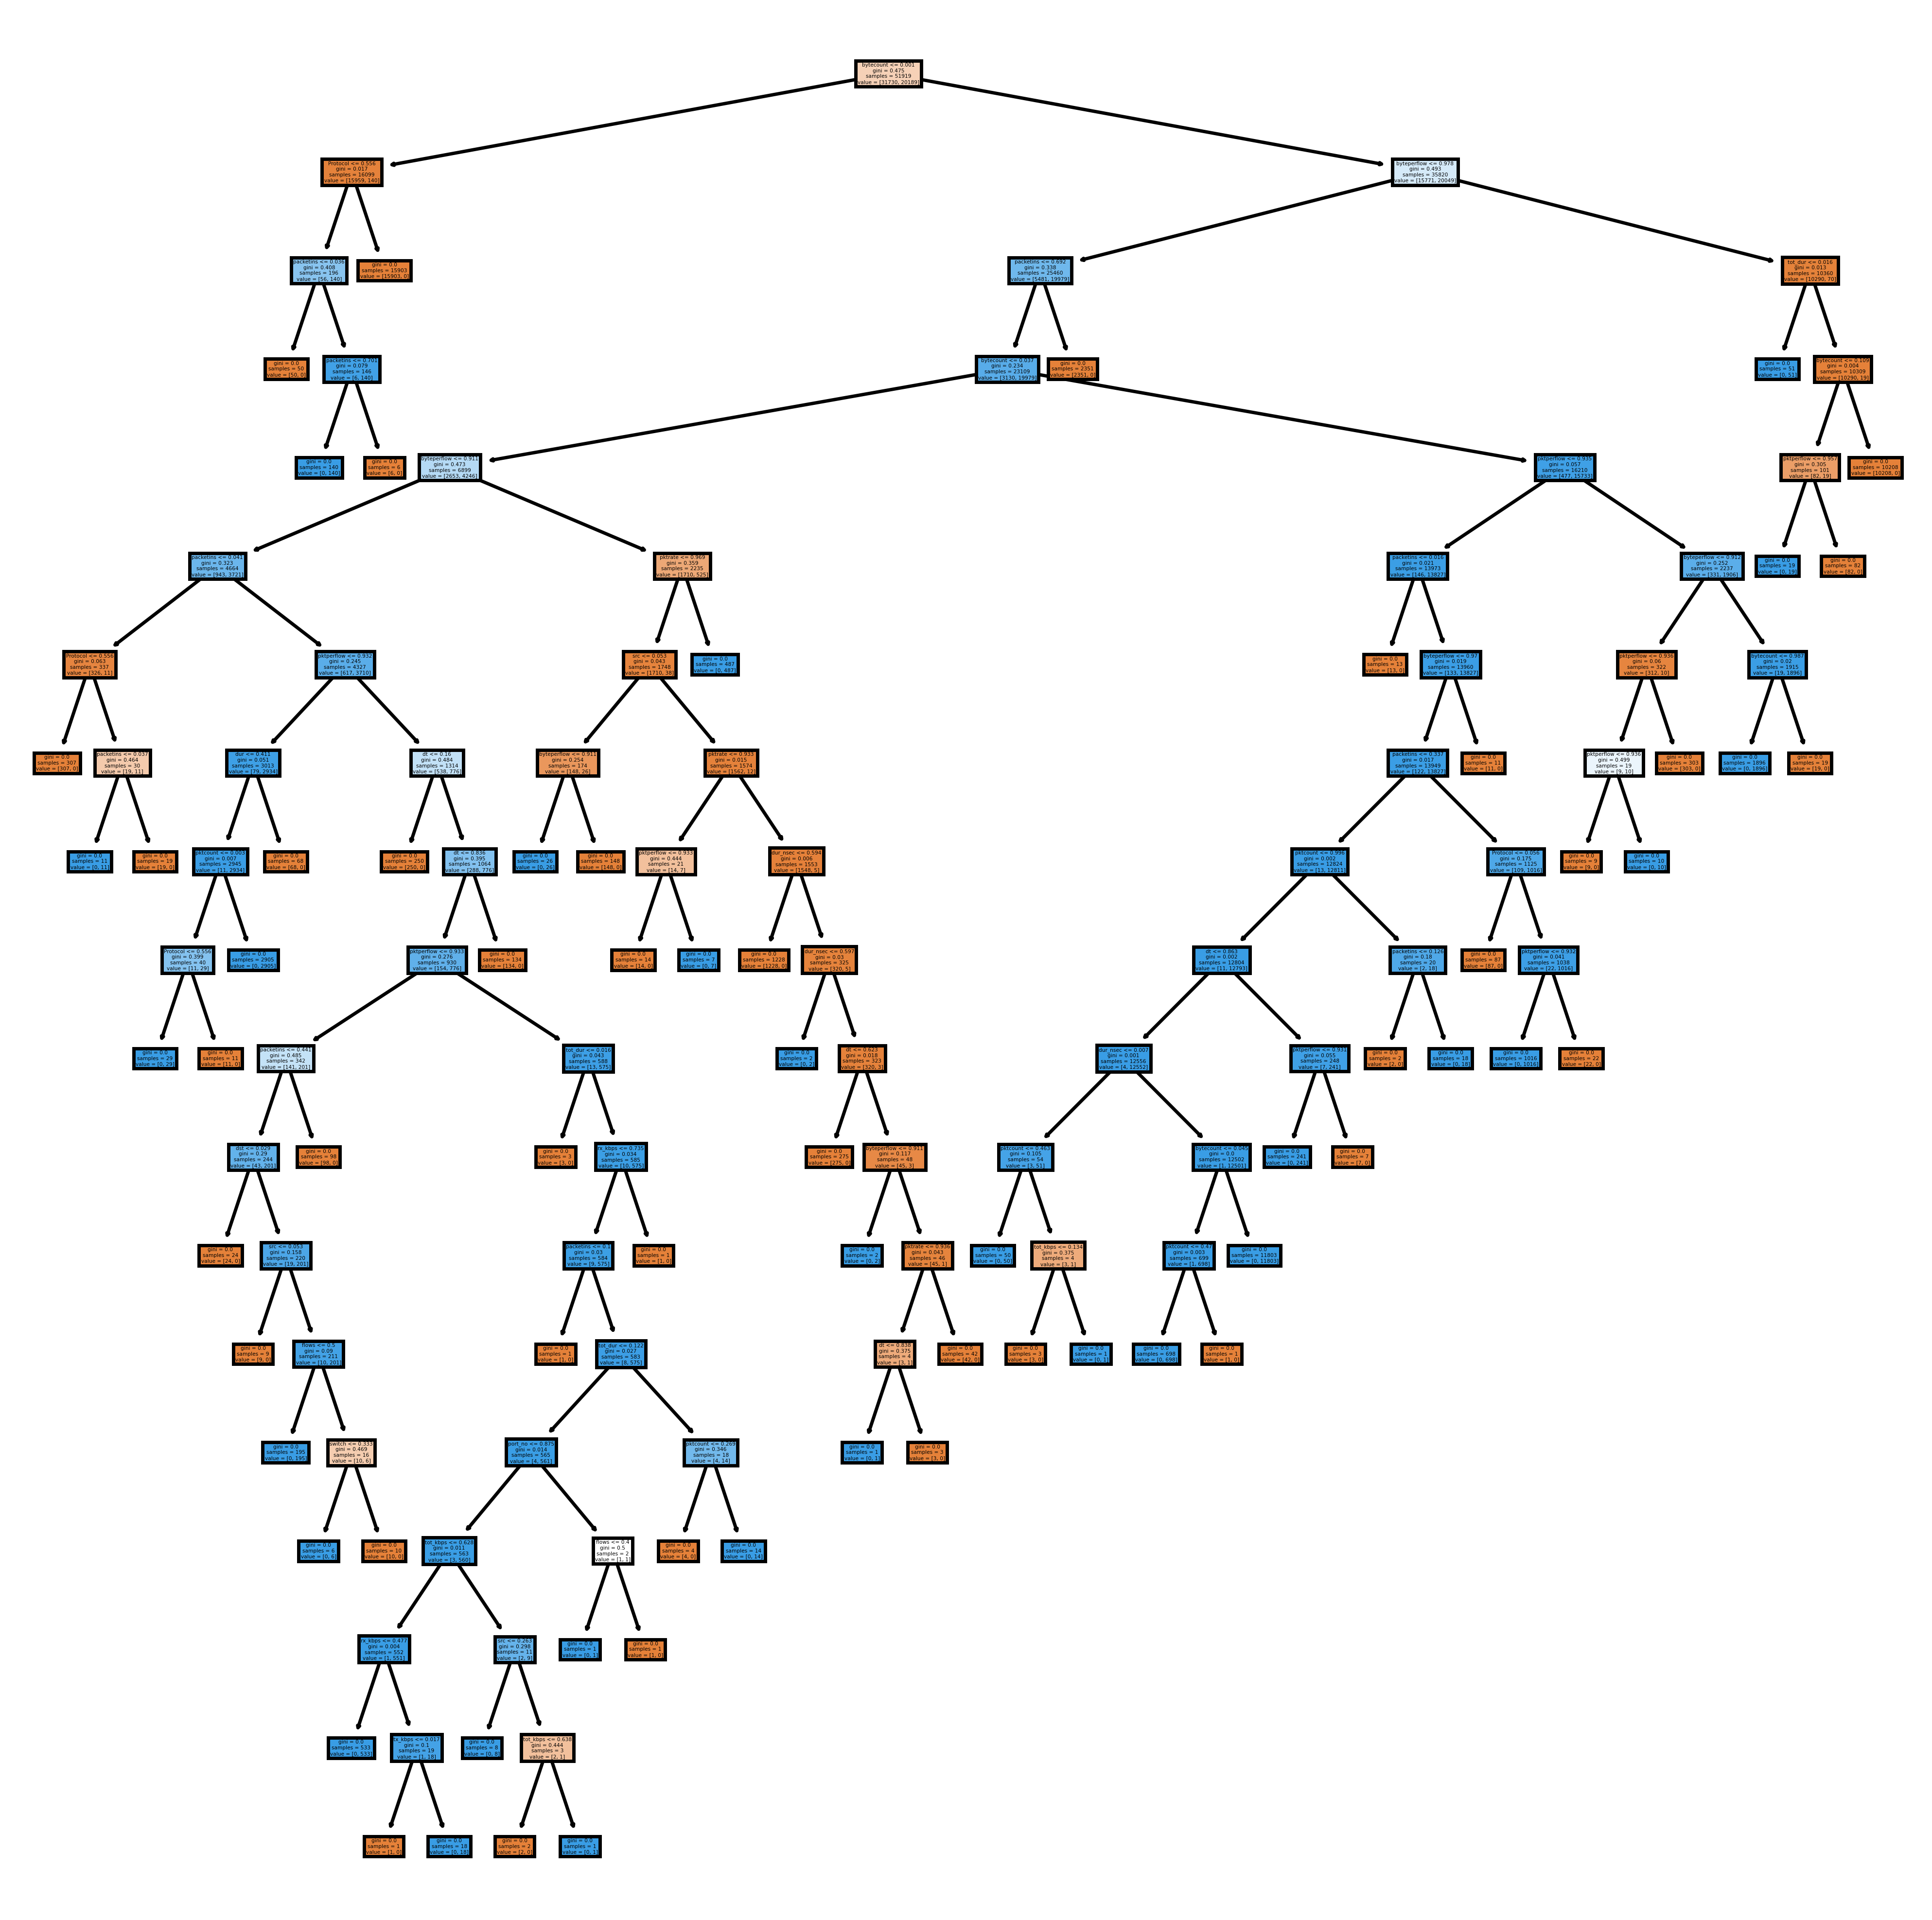

In [50]:
plt.rcParams['figure.dpi'] = 500
fig = plt.figure(figsize=(10,10))
tree.plot_tree(dt,feature_names=X.columns,filled=True)

In [51]:
ypred=dt.predict(X_test)
print("DECISION TREE")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))

DECISION TREE
Confusion matrix:
 [[31594    11]
 [    4 20311]]
Accuracy:  0.999711093990755


In [63]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train,y_train)

SVC()

In [64]:
ypred=sv.predict(X_test)
print("SVM")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))

SVM
Confusion matrix:
 [[30270  1509]
 [  567 19574]]
Accuracy:  0.960015408320493


FEATURE SELECTION USING RF

In [65]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier())
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [66]:
sel.get_support()


array([False, False, False, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False])

In [74]:
col=X.columns
selcol=sel.get_support()
l=[col[i] for i in range(22) if selcol[i]==False]
print(l)

['pktcount', 'bytecount', 'packetins', 'pktperflow', 'byteperflow', 'pktrate']


In [76]:
X_train = X_train.drop(columns=l)
X_test = X_test.drop(columns=l)


In [78]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)
print("RANDOM FOREST")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))

RANDOM FOREST
Confusion matrix:
 [[31590   189]
 [  229 19912]]
Accuracy:  0.9919491525423729


In [89]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
ypred=dt.predict(X_test)
print("DECISION TREE")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))

DECISION TREE
Confusion matrix:
 [[31620   159]
 [  210 19931]]
Accuracy:  0.9928929121725731


In [90]:
sv = svm.SVC()
sv.fit(X_train,y_train)
ypred=sv.predict(X_test)
print("SVM")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))


SVM
Confusion matrix:
 [[29412  2367]
 [ 4692 15449]]
Accuracy:  0.8640408320493066
